<a href="https://colab.research.google.com/github/ArminD93/KeplerExoplanetSearchResults/blob/dev/KeplerExoplanetSearchResults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kepler Exoplanet Search Results**
---

# **Spis treści:**

# 1. [**Opis wartości z kolumn**](#0)
# 2. [**Import bibliotek**](#1)
# 3. [**Przygotowanie danych:**](#2)
  ## 3.1. [Prezentacja danych](#3)
  ## 3.2. [Usunięcie niepotrzebnych kolumn](#4)  
  ## 3.3. [Zmiana typu object na typ category](#5)
  ## 3.4. [Brakujące wartości](#6)
# 4. [**Wyznaczenie wartości statystycznych**](#7)
# 5. [**Analiza danych**](#8)
  ## 5.1. [Analiza rozkładu wartości](#9)
  ## 5.2. [Pogrupowanie danych](#10)
  ## 5.3. [Analiza korelacji](#11)
# 6. [**Uczenie maszynowe:**](#12)
  ## 6.1. [Przygotowanie danych do uczenia maszynowego:](#13)
   ### 6.1.1. [Liczba występowań dla każdej z etykiet](#14)  
   ### 6.1.2. [Zakodowanie wartości etykiet](#15)
   ### 6.1.3. [Podział danych na zbiory uczące i testowe](#16)   
   ### 6.1.4. [Skalowanie cech](#17)
  ## 6.2. [Testowanie modeli:](#18)  
   ### 6.2.1. [Model regresji logistycznej](#19)  
   ### 6.2.2. [Model k-najbliższych sąsiadów](#20)
   ### 6.2.3. [Model drzewa decyzyjnego](#21)     
   ### 6.2.4. [Model lasów losowych](#22)  
   ### 6.2.5. [Model maszyny wektorów nośnych](#23)     
   ### 6.2.6. [Naiwny klasyfikator bayesowski](#24) 
  ## 6.3. [Porównanie otrzymanych wyników](#25)  
  ## 6.4. [Przeprowadzenie walidacji krzyżowej](#26)
  ## 6.5. [Podgląd na macierze błędów dla poszczególnych modeli](#27)
  ## 6.6. [Testowanie sieci neuronowej](#28)  
  ## 6.7. [Zastosowanie redukcji wymiarowości - algorytm PCA](#29)  
   ## 6.8. [Alogrytm KMeans](#30)   

  
    
 









# <a name='0'></a>**1. Opis wartości z kolumn**


### Oznaczenia:

KOI - Kepler Objects of Interest

| Oznaczenie         | Opis             | 
| :----------------- | -----------------: |
|kepid|Identyfikacja Keplera|
|kepoi_name |**Nazwa KOI**. Liczba używana do identyfikacji i śledzenia obiektu zainteresowania Keplera (KOI). KOI to cel zidentyfikowany przez Kepler Project, który wyświetla co najmniej jedną sekwencję podobną do tranzytu w obrębie fotometrii szeregów czasowych Keplera, która wydaje się być astrofizyczna i początkowo zgodna z hipotezą przejścia planetarnego.|
|kepler_name |**Nazwa Keplera**. Nazwa numeru Keplera w formie „Kepler-N” plus mała litera identyfikująca planetę. Zasadniczo liczby te są łatwiejsze do zapamiętania niż odpowiadające im oznaczenia KOI lub KIC / KepID i mają na celu wyraźne wskazanie klasy obiektów, które zostały potwierdzone lub zatwierdzone jako planety - krok wyżej od oznaczenia kandydata na planetę.|
| **koi_disposition**|Czy obiekt został zidentyfikowany? Kategoria rozpoznania obiektu|
|koi_pdisposition|Rozpoznanie z wykorzystaniem danych Keplera|
| koi_score|Wartość od 0 do 1 określa pewność identyfikacji - Im bliżej 1 tym jest wysokie prawdopodobieństwo|  
| koi_fpflag_nt|**Flaga inna niż tranzytowa**  Obejmuje to między innymi artefakty instrumentalne, nie zmienne gwiazdy zmienne i fałszywe detekcje (bardzo niski SNR).| 
| koi_fpflag_ss      |**Flaga Gwiezdnego Zaćmienia** zdarzenie podobne do przejścia jest najprawdopodobniej spowodowane przez binarne zaćmienie.|
| koi_fpflag_co      |**Flaga przesunięcia środka ciężkości** Źródło sygnału pochodzi z pobliskiej gwiazdy,|
| koi_fpflag_ec      |**Dopasowanie efemeryd wskazuje flagę zanieczyszczenia** KOI ma ten sam okres i epokę co inny obiekt i jest oceniany jako wynik zanieczyszczenia topnikiem w otworze lub przesłuchu  elektronicznego.|
| koi_period         |**Okres obiegu (dni)** Odstęp między kolejnymi tranzytami planetarnymi. ( kolumny niepewności err1 i err2 )       |
| koi_time0bk        |**Epoka tranzytowa (BJD - 2 454 833,0))** Czas odpowiadający środkowi pierwszego wykrytego tranzytu w barycentrycznym dniu juliańskim (BJD) minus stałe przesunięcie 2 454 833,0 dni. Przesunięcie odpowiada godzinie 12:00 1 stycznia 2009 r. UTC. ( kolumny niepewności err1 i err2 )| 
| koi_impact         |Przewidywana przez niebo odległość między środkiem tarczy gwiezdnej a środkiem tarczy planety w połączeniu, znormalizowana przez promień gwiezdny.|
| koi_duration       |**Czas tranzytu (godziny)** Czas trwania zaobserwowanych tranzytów. Czas trwania mierzy się od pierwszego kontaktu planety z gwiazdą do ostatniego kontaktu. Czasy kontaktu są zwykle obliczane na podstawie najlepiej dopasowanego modelu wyprodukowanego przez model Mandela-Agola (2002) dopasowanego do wielowartościowej krzywej światła Keplera, przy założeniu efemerydy liniowej orbity.|
| koi_depth          |**Głębokość tranzytu (części na milion)** Część strumienia gwiezdnego utracona przy minimalnym transporcie planetarnym.|
| koi_prad           |**Promień planety** Promień planetarny jest iloczynem stosunku promienia gwiazdy planety i promienia gwiazdy.|
| koi_teq            |**Temperatura równowagi(Kelvin)** Przybliżenie temperatury planety.|
| koi_insol          |**Strumień nasłonecznienia**.Strumień nasłonecznienia jest innym sposobem na uzyskanie temperatury równowagi. Zależy to od parametrów gwiezdnych (w szczególności promienia i temperatury gwiezdnej) oraz od półosi głównej osi planety. Jest podawany w jednostkach względem jednostek zmierzonych dla Ziemi od Słońca.| 
| koi_model_snr        |**Tranzyt sygnału do szumu** Głębokość tranzytu znormalizowana przez średnią niepewność strumienia podczas tranzytu.|
| koi_tce_plnt_num     |Numer planety TCE stowarzyszony z KOI.|
|koi_tce_delivname|Nazwa dostawy TCE odpowiadająca danym TCE stowarzyszonym z KOI.|
| koi_steff            |**Temperatura fotosfery gwiazdy** Fotosfera – widzialna, powierzchniowa warstwa gwiazdy, emitująca na zewnątrz gwiazdy fale elektromagnetyczne w postaci światła widzialnego.|    
| koi_slogg    |**Grawitacja powierzchni gwiazd (log10 (cm s-2)** Podstawowy logarytm 10 przyspieszenia wywołanego grawitacją na powierzchni gwiazdy.|    
| koi_srad    | **Promieś gwiezdny** Fotosferyczny promień gwiazdy.|               
| ra   |**RA (deg). Rektascensja**, α (łac. recta ascensio – "wznoszenie proste") – jedna ze współrzędnych astronomicznych, określających położenie ciała niebieskiego na sferze niebieskiej w układzie współrzędnych astronomicznych zwanym układem równikowym równonocnym.|                
| dec  |**Dec (deg). Deklinacja** (łac. declinatio – „odchylenie”, oznaczana symbolem δ) – jedna ze współrzędnych określających położenie ciała w obydwu układach równikowych: równonocnym i godzinnym. Definiujemy ją jako kąt pomiędzy kierunkiem poprowadzonym od obserwatora do obiektu a płaszczyzną równika niebieskiego.|                  
| koi_kepmag|Kepler-band (mag)|               

# <a name='1'></a>**2. Import bibliotek**

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
sns.set(style="ticks", color_codes=True)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from mlxtend.plotting import plot_confusion_matrix

# <a name='2'></a>**3. Przygotowanie danych**


## <a name='3'></a>3.1. Prezentacja danych

In [68]:
kepler_raw = pd.read_csv('/content/drive/My Drive/ColabNotebooks/KeplerExoplanetSearchResults/datasets/cumulative.csv', low_memory=False)

# Kopia danych
kepler = kepler_raw.copy()                         
                            
kepler.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [69]:
kepler.info(memory_usage='Deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

## <a name='4'></a>3.2 Usunięcie niepotrzebnych kolumn


In [70]:
for i, column in enumerate(kepler.columns):

  if column.endswith('_err1') or column.endswith('_err2'): 
      kepler.drop([column], 1, inplace=True)

for i, name in enumerate(['kepid', 'rowid', 'kepoi_name', 'kepler_name', 'koi_pdisposition','koi_tce_plnt_num', 'koi_tce_delivname', 'koi_score']):
  kepler.drop([name], 1, inplace=True)

kepler.info(memory_usage='Deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   koi_disposition  9564 non-null   object 
 1   koi_fpflag_nt    9564 non-null   int64  
 2   koi_fpflag_ss    9564 non-null   int64  
 3   koi_fpflag_co    9564 non-null   int64  
 4   koi_fpflag_ec    9564 non-null   int64  
 5   koi_period       9564 non-null   float64
 6   koi_time0bk      9564 non-null   float64
 7   koi_impact       9201 non-null   float64
 8   koi_duration     9564 non-null   float64
 9   koi_depth        9201 non-null   float64
 10  koi_prad         9201 non-null   float64
 11  koi_teq          9201 non-null   float64
 12  koi_insol        9243 non-null   float64
 13  koi_model_snr    9201 non-null   float64
 14  koi_steff        9201 non-null   float64
 15  koi_slogg        9201 non-null   float64
 16  koi_srad         9201 non-null   float64
 17  ra            

## <a name='5'></a>3.3 Zmiana typu object na typ category


In [71]:
kepler['koi_disposition'] = kepler['koi_disposition'].astype('category')
kepler.info(memory_usage='Deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   koi_disposition  9564 non-null   category
 1   koi_fpflag_nt    9564 non-null   int64   
 2   koi_fpflag_ss    9564 non-null   int64   
 3   koi_fpflag_co    9564 non-null   int64   
 4   koi_fpflag_ec    9564 non-null   int64   
 5   koi_period       9564 non-null   float64 
 6   koi_time0bk      9564 non-null   float64 
 7   koi_impact       9201 non-null   float64 
 8   koi_duration     9564 non-null   float64 
 9   koi_depth        9201 non-null   float64 
 10  koi_prad         9201 non-null   float64 
 11  koi_teq          9201 non-null   float64 
 12  koi_insol        9243 non-null   float64 
 13  koi_model_snr    9201 non-null   float64 
 14  koi_steff        9201 non-null   float64 
 15  koi_slogg        9201 non-null   float64 
 16  koi_srad         9201 non-null   float64 


## <a name='6'></a>3.4 Brakujące wartości

In [72]:
# Sprawdzenie braków
kepler.isnull().sum()

koi_disposition      0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_time0bk          0
koi_impact         363
koi_duration         0
koi_depth          363
koi_prad           363
koi_teq            363
koi_insol          321
koi_model_snr      363
koi_steff          363
koi_slogg          363
koi_srad           363
ra                   0
dec                  0
koi_kepmag           1
dtype: int64

In [73]:
kepler[pd.isnull(kepler['koi_impact'])].head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
329,FALSE POSITIVE,0,0,0,0,0.734525,133.431080,NaN,6.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,293.28799,41.560455,13.220
357,FALSE POSITIVE,0,0,0,0,6.721078,134.777598,NaN,7.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,291.60690,38.348061,14.792
476,CANDIDATE,0,0,0,0,1.008617,132.109479,NaN,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,292.47971,38.514919,15.319
490,FALSE POSITIVE,1,0,1,1,200.611033,456.844440,NaN,7.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.51962,44.453941,15.783
492,FALSE POSITIVE,1,0,1,1,1.634846,134.512115,NaN,6.11,NaN,NaN,NaN,17098.4,NaN,NaN,NaN,NaN,298.21188,44.324638,12.647


In [74]:
kepler = kepler.dropna()
kepler.info(memory_usage='Deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9200 entries, 0 to 9563
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   koi_disposition  9200 non-null   category
 1   koi_fpflag_nt    9200 non-null   int64   
 2   koi_fpflag_ss    9200 non-null   int64   
 3   koi_fpflag_co    9200 non-null   int64   
 4   koi_fpflag_ec    9200 non-null   int64   
 5   koi_period       9200 non-null   float64 
 6   koi_time0bk      9200 non-null   float64 
 7   koi_impact       9200 non-null   float64 
 8   koi_duration     9200 non-null   float64 
 9   koi_depth        9200 non-null   float64 
 10  koi_prad         9200 non-null   float64 
 11  koi_teq          9200 non-null   float64 
 12  koi_insol        9200 non-null   float64 
 13  koi_model_snr    9200 non-null   float64 
 14  koi_steff        9200 non-null   float64 
 15  koi_slogg        9200 non-null   float64 
 16  koi_srad         9200 non-null   float64 


# <a name='7'></a>**5. Analiza danych**

### Oznaczenia:

KOI - Kepler Objects of Interest

| Oznaczenie         | Opis             | 
| :----------------- | -----------------: |
| koi_period         |**Okres obiegu (dni)** Odstęp między kolejnymi tranzytami planetarnymi. ( kolumny niepewności err1 i err2 )       |
| koi_time0bk        |**Epoka tranzytowa (BJD - 2 454 833,0))** Czas odpowiadający środkowi pierwszego wykrytego tranzytu w barycentrycznym dniu juliańskim (BJD) minus stałe przesunięcie 2 454 833,0 dni. Przesunięcie odpowiada godzinie 12:00 1 stycznia 2009 r. UTC. ( kolumny niepewności err1 i err2 )| 
| koi_impact         |Przewidywana przez niebo odległość między środkiem tarczy gwiezdnej a środkiem tarczy planety w połączeniu, znormalizowana przez promień gwiezdny.|
| koi_duration       |**Czas tranzytu (godziny)** Czas trwania zaobserwowanych tranzytów. Czas trwania mierzy się od pierwszego kontaktu planety z gwiazdą do ostatniego kontaktu. Czasy kontaktu są zwykle obliczane na podstawie najlepiej dopasowanego modelu wyprodukowanego przez model Mandela-Agola (2002) dopasowanego do wielowartościowej krzywej światła Keplera, przy założeniu efemerydy liniowej orbity.|
| koi_depth          |**Głębokość tranzytu (części na milion)** Część strumienia gwiezdnego utracona przy minimalnym transporcie planetarnym.|
| koi_prad           |**Promień planety** Promień planetarny jest iloczynem stosunku promienia gwiazdy planety i promienia gwiazdy.|
| koi_teq            |**Temperatura równowagi(Kelvin)** Przybliżenie temperatury planety.|
| koi_insol          |**Strumień nasłonecznienia**.Strumień nasłonecznienia jest innym sposobem na uzyskanie temperatury równowagi. Zależy to od parametrów gwiezdnych (w szczególności promienia i temperatury gwiezdnej) oraz od półosi głównej osi planety. Jest podawany w jednostkach względem jednostek zmierzonych dla Ziemi od Słońca.| 
| koi_model_snr        |**Tranzyt sygnału do szumu** Głębokość tranzytu znormalizowana przez średnią niepewność strumienia podczas tranzytu.|
| koi_tce_plnt_num     |Numer planety TCE stowarzyszony z KOI.|
|koi_tce_delivname|Nazwa dostawy TCE odpowiadająca danym TCE stowarzyszonym z KOI.|
| koi_steff            |**Temperatura fotosfery gwiazdy** Fotosfera – widzialna, powierzchniowa warstwa gwiazdy, emitująca na zewnątrz gwiazdy fale elektromagnetyczne w postaci światła widzialnego.|    
| koi_slogg    |**Grawitacja powierzchni gwiazd (log10 (cm s-2)** Podstawowy logarytm 10 przyspieszenia wywołanego grawitacją na powierzchni gwiazdy.|    
| koi_srad    | **Promieś gwiezdny** Fotosferyczny promień gwiazdy.|               
| ra   |**RA (deg). Rektascensja**, α (łac. recta ascensio – "wznoszenie proste") – jedna ze współrzędnych astronomicznych, określających położenie ciała niebieskiego na sferze niebieskiej w układzie współrzędnych astronomicznych zwanym układem równikowym równonocnym.|                
| dec  |**Dec (deg). Deklinacja** (łac. declinatio – „odchylenie”, oznaczana symbolem δ) – jedna ze współrzędnych określających położenie ciała w obydwu układach równikowych: równonocnym i godzinnym. Definiujemy ją jako kąt pomiędzy kierunkiem poprowadzonym od obserwatora do obiektu a płaszczyzną równika niebieskiego.|                  
| koi_kepmag|Kepler-band (mag)|               

In [75]:
kepler['koi_disposition'].value_counts()

FALSE POSITIVE    4723
CONFIRMED         2292
CANDIDATE         2185
Name: koi_disposition, dtype: int64

In [76]:
kepler_CONFIRMED = kepler.where(kepler['koi_disposition'] == 'CONFIRMED').dropna()
kepler_CANDIDATE = kepler.where(kepler['koi_disposition'] == 'CANDIDATE').dropna()
kepler_FALSE_POSITIVE = kepler.where(kepler['koi_disposition'] == 'FALSE POSITIVE').dropna()


kepler_CONFIRMED.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,0.0,0.0,0.0,0.0,9.488036,170.53875,0.146,2.9575,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,CONFIRMED,0.0,0.0,0.0,0.0,54.418383,162.51384,0.586,4.5070,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
4,CONFIRMED,0.0,0.0,0.0,0.0,2.525592,171.59555,0.701,1.6545,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509
5,CONFIRMED,0.0,0.0,0.0,0.0,11.094321,171.20116,0.538,4.5945,1517.5,3.90,835.0,114.81,66.5,6046.0,4.486,0.972,296.28613,48.224670,15.714
6,CONFIRMED,0.0,0.0,0.0,0.0,4.134435,172.97937,0.762,3.1402,686.0,2.77,1160.0,427.65,40.2,6046.0,4.486,0.972,296.28613,48.224670,15.714


## <a name='8'></a>5.1 Wyznaczenie wartości statystycznych

In [77]:
kepler[kepler.columns[5:]].describe().T.apply(lambda x: round(x, 3))

,count,mean,std,min,25%,50%,75%,max
koi_period,9200.0,74.316,1360.613,0.242,2.683,9.300,36.874,1.299958e+05
koi_time0bk,9200.0,165.465,67.318,120.516,132.746,137.021,170.370,1.472522e+03
koi_impact,9200.0,0.735,3.349,0.000,0.197,0.537,0.888,1.008060e+02
koi_duration,9200.0,5.655,6.500,0.052,2.453,3.824,6.291,1.385400e+02
koi_depth,9200.0,23789.863,82247.032,0.000,159.900,421.000,1473.100,1.541400e+06
koi_prad,9200.0,102.898,3077.806,0.080,1.400,2.390,14.930,2.003460e+05
koi_teq,9200.0,1085.357,856.393,25.000,539.000,878.000,1379.000,1.466700e+04
koi_insol,9200.0,7717.364,159554.193,0.000,19.998,140.670,853.530,1.094755e+07
koi_model_snr,9200.0,259.898,795.850,0.000,12.000,23.000,78.000,9.054700e+03
koi_steff,9200.0,5706.815,796.901,2661.000,5309.750,5767.000,6112.250,1.589600e+04


## <a name='9'></a>5.2 Pogrupowanie danych

In [78]:
kepler_groupby_disposition = kepler.groupby(by='koi_disposition')

In [79]:
kepler_groupby_disposition.groups

{'CANDIDATE': Int64Index([  37,   58,   62,   63,   72,   84,   92,   94,  103,  112,
             ...
             9533, 9539, 9542, 9544, 9546, 9550, 9551, 9557, 9558, 9561],
            dtype='int64', length=2185),
 'CONFIRMED': Int64Index([   0,    1,    4,    5,    6,    7,    9,   10,   11,   12,
             ...
             9178, 9219, 9221, 9264, 9305, 9309, 9353, 9355, 9479, 9540],
            dtype='int64', length=2292),
 'FALSE POSITIVE': Int64Index([   2,    3,    8,   14,   15,   16,   17,   20,   24,   28,
             ...
             9549, 9552, 9553, 9554, 9555, 9556, 9559, 9560, 9562, 9563],
            dtype='int64', length=4723)}

In [80]:
[col for col in kepler.columns[5:]]

['koi_period',
 'koi_time0bk',
 'koi_impact',
 'koi_duration',
 'koi_depth',
 'koi_prad',
 'koi_teq',
 'koi_insol',
 'koi_model_snr',
 'koi_steff',
 'koi_slogg',
 'koi_srad',
 'ra',
 'dec',
 'koi_kepmag']

In [81]:
kepler_groupby_disposition_mean_std = kepler_groupby_disposition.agg(
                                                                      {
                                                                        'koi_period'    : ['mean', 'std'],
                                                                        'koi_time0bk'   : ['mean', 'std'],
                                                                        'koi_impact'    : ['mean', 'std'],
                                                                        'koi_duration'  : ['mean', 'std'],
                                                                        'koi_depth'     : ['mean', 'std'],
                                                                        'koi_prad'      : ['mean', 'std'],
                                                                        'koi_teq'       : ['mean', 'std'],
                                                                        'koi_insol'     : ['mean', 'std'],
                                                                        'koi_model_snr' : ['mean', 'std'],
                                                                        'koi_steff'     : ['mean', 'std'],
                                                                        'koi_slogg'     : ['mean', 'std'],
                                                                        'koi_srad'      : ['mean', 'std'],
                                                                        'ra'            : ['mean', 'std'],
                                                                        'dec'           : ['mean', 'std'],
                                                                        'koi_kepmag'    : ['mean', 'std']
                                                                      }
                                                                    ).apply(lambda x: round(x, 3))


kepler_groupby_disposition_mean_std.T

koi_disposition      CANDIDATE  CONFIRMED  FALSE POSITIVE
koi_period    mean     131.283     27.053          70.897
              std     2783.360     54.028         138.975
koi_time0bk   mean     170.316    157.246         167.210
              std       75.209     42.481          72.731
koi_impact    mean       0.537      0.427           0.976
              std        1.990      0.332           4.454
koi_duration  mean       4.814      4.307           6.698
              std        4.421      2.720           8.209
koi_depth     mean    1864.239   1141.446       44924.240
              std    12502.100   2686.208      110382.027
koi_prad      mean      15.931      2.872         191.672
              std      316.937      3.361        4288.541
koi_teq       mean     882.420    839.126        1298.734
              std      665.620    386.741        1028.230
koi_insol     mean    5359.428    350.666       12383.162
              std   155923.364   1223.676      195698.944
koi_model_snr mean      45.596     87.923         442.498
              std      231.866    284.086        1049.244
koi_steff     mean    5639.767   5477.974        5848.887
              std      693.971    677.133         862.706
koi_slogg     mean       4.331      4.411           4.251
              std        0.391      0.235           0.508
koi_srad      mean       1.566      1.067           2.125
              std        5.875      0.643           7.523
ra            mean     291.790    290.943         292.733
              std        4.835      4.757           4.612
dec           mean      43.928     44.366          43.484
              std        3.606      3.569           3.581
koi_kepmag    mean      14.348     14.339          14.212
              std        1.303      1.224           1.477

## <a name='10'></a>5.3 Analiza rozkładu wartości

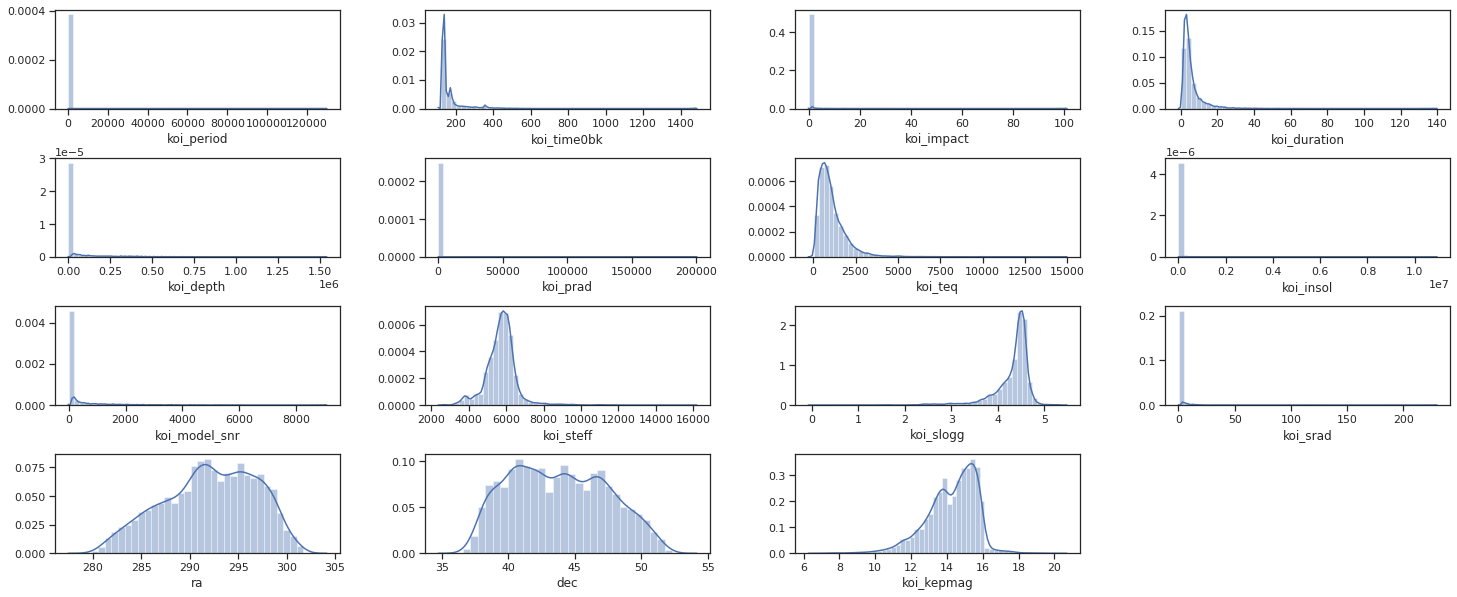

In [82]:
cols = kepler.columns[5:]

fig = plt.figure(figsize=(25,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

col_idx = 0
for i in range(1, 16):
  fig.add_subplot(4, 4, i) 
  sns.distplot(kepler[cols[col_idx]])
  col_idx += 1

plt.show()

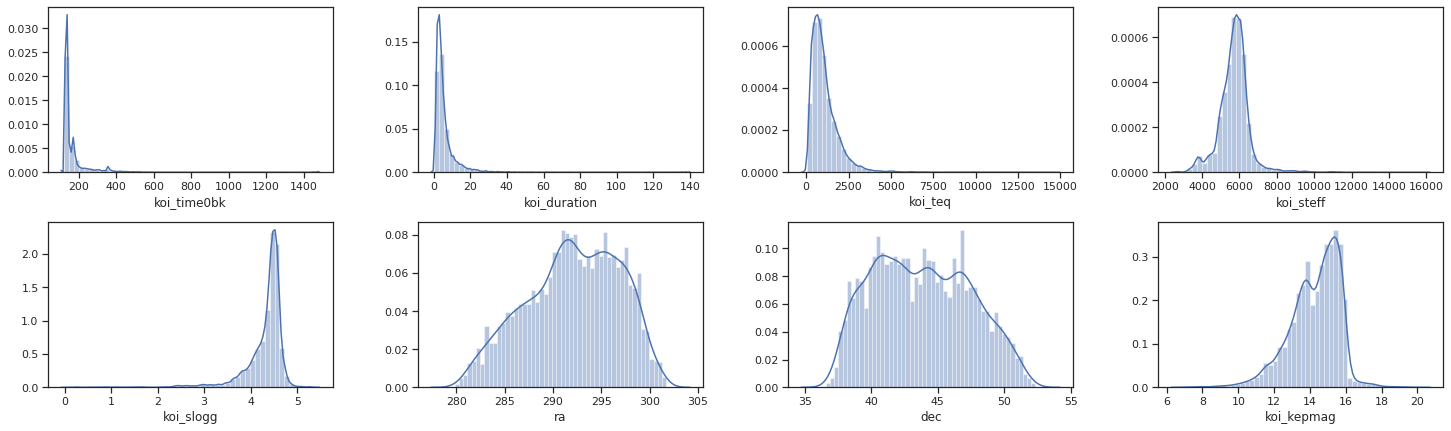

In [83]:
cols = [ 'koi_time0bk', 'koi_duration', 'koi_teq',
        'koi_steff', 	'koi_slogg', 'ra', 	'dec', 	'koi_kepmag']

fig = plt.figure(figsize=(25,7))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

col_idx = 0
for i in range(1, 9):
  fig.add_subplot(2, 4, i) 
  sns.distplot(kepler[cols[col_idx]], bins=50, )
  col_idx += 1

plt.show()

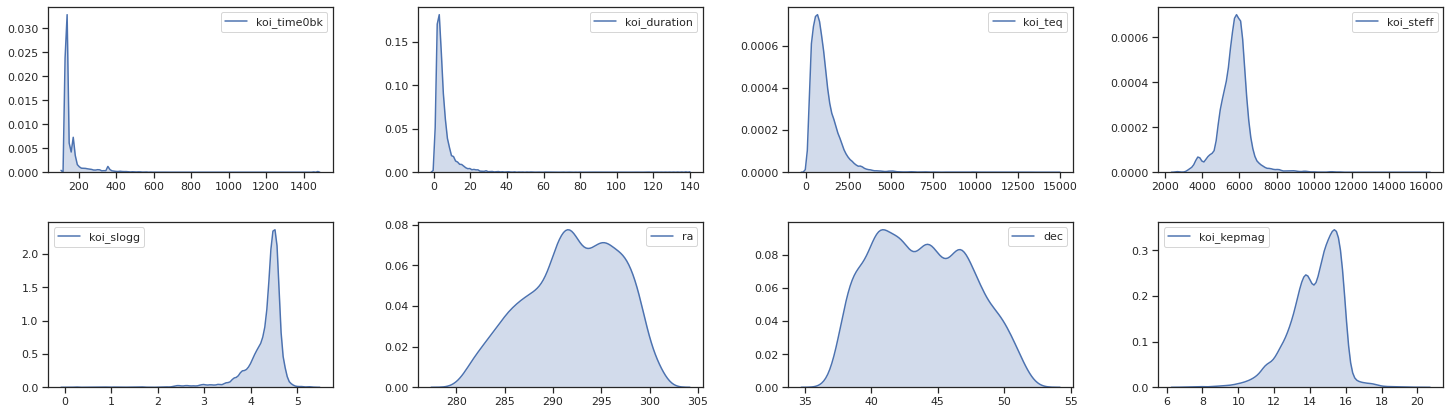

In [84]:
fig = plt.figure(figsize=(25,7))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

col_idx = 0
for i in range(1, 9):
  fig.add_subplot(2, 4, i) 
  sns.kdeplot(kepler[cols[col_idx]], shade=True)
  col_idx += 1

plt.show()

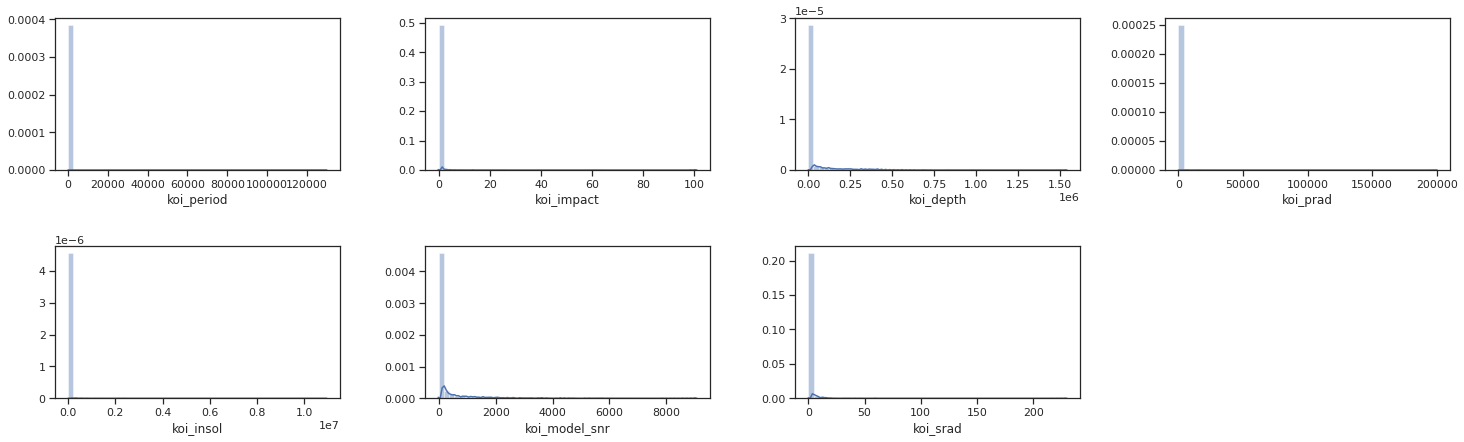

In [85]:
cols = [ 'koi_period', 'koi_impact', 'koi_depth', 'koi_prad', 
        'koi_insol', 	'koi_model_snr', 	'koi_srad' ]

fig = plt.figure(figsize=(25,7))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

col_idx = 0
for i in range(1, 8):
  fig.add_subplot(2, 4, i) 
  sns.distplot(kepler[cols[col_idx]], bins=50)
  col_idx += 1


plt.show()

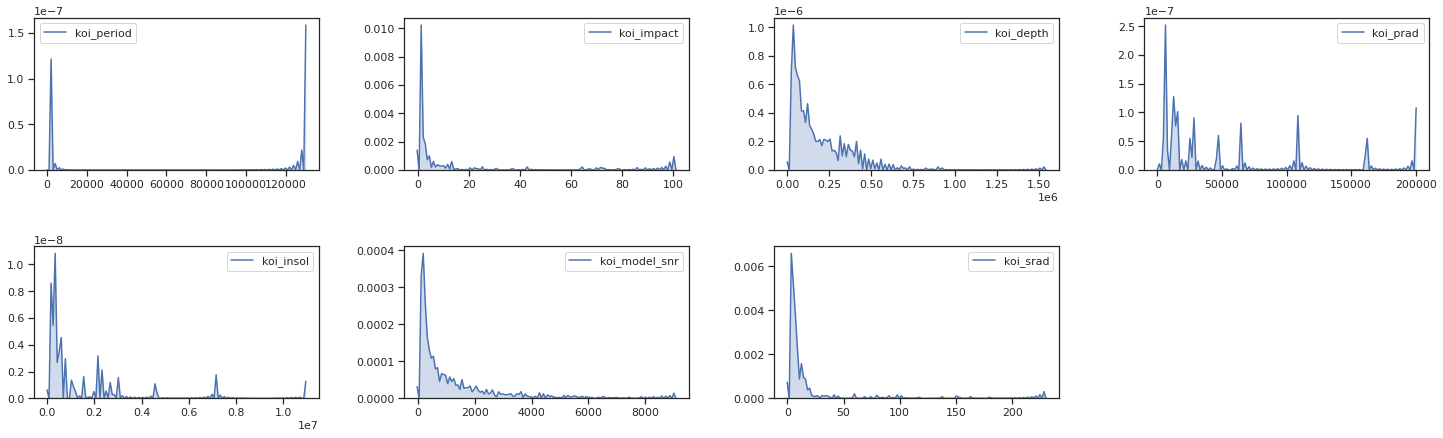

In [86]:
fig = plt.figure(figsize=(25,7))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

col_idx = 0
for i in range(1, 8):
  fig.add_subplot(2, 4, i) 
  sns.kdeplot(kepler[cols[col_idx]],  shade=True)
  col_idx += 1


plt.show()

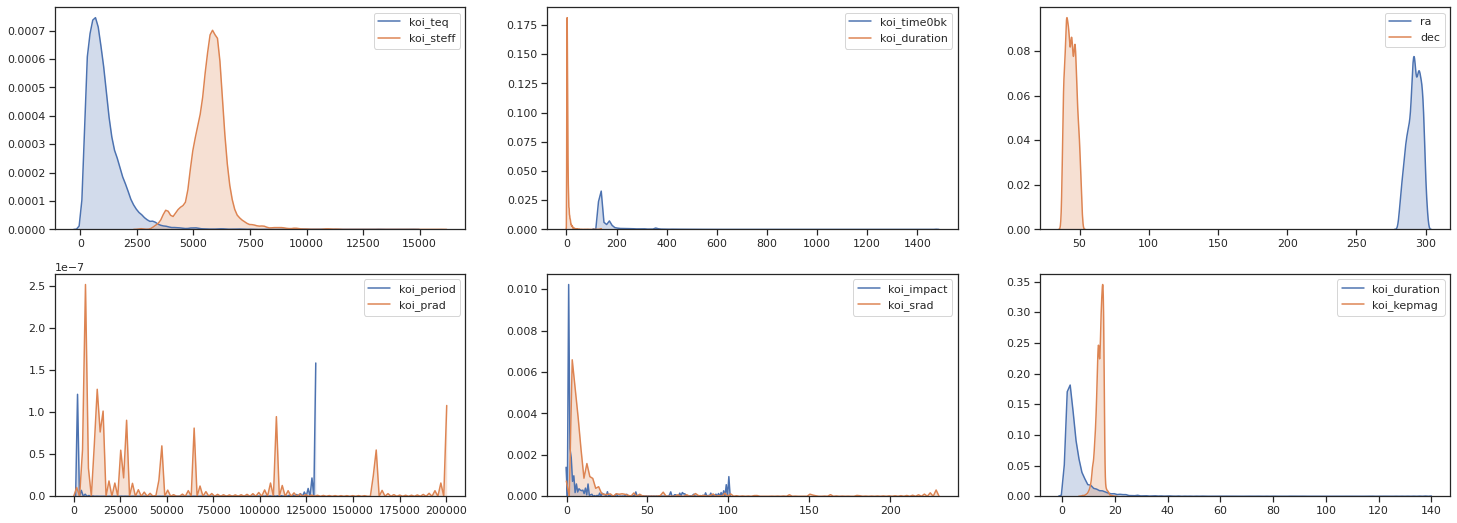

In [87]:
fig, ax = plt.subplots(2, 3, figsize=(25,9))

g1 = sns.kdeplot(kepler['koi_teq'], shade=True, ax=ax[0,0])
g2 = sns.kdeplot(kepler['koi_steff'], shade=True, ax=ax[0,0])

g3 = sns.kdeplot(kepler['koi_time0bk'], shade=True, ax=ax[0,1])
g4 = sns.kdeplot(kepler['koi_duration'], shade=True, ax=ax[0,1])

g5 = sns.kdeplot(kepler['ra'], shade=True, ax=ax[0,2])
g6 = sns.kdeplot(kepler['dec'], shade=True, ax=ax[0,2])


g1 = sns.kdeplot(kepler['koi_period'], shade=True, ax=ax[1,0])
g2 = sns.kdeplot(kepler['koi_prad'], shade=True, ax=ax[1,0])

g3 = sns.kdeplot(kepler['koi_impact'], shade=True, ax=ax[1,1])
g4 = sns.kdeplot(kepler['koi_srad'], shade=True, ax=ax[1,1])

g5 = sns.kdeplot(kepler['koi_duration'], shade=True, ax=ax[1,2])
g6 = sns.kdeplot(kepler['koi_kepmag'], shade=True, ax=ax[1,2])

plt.show()

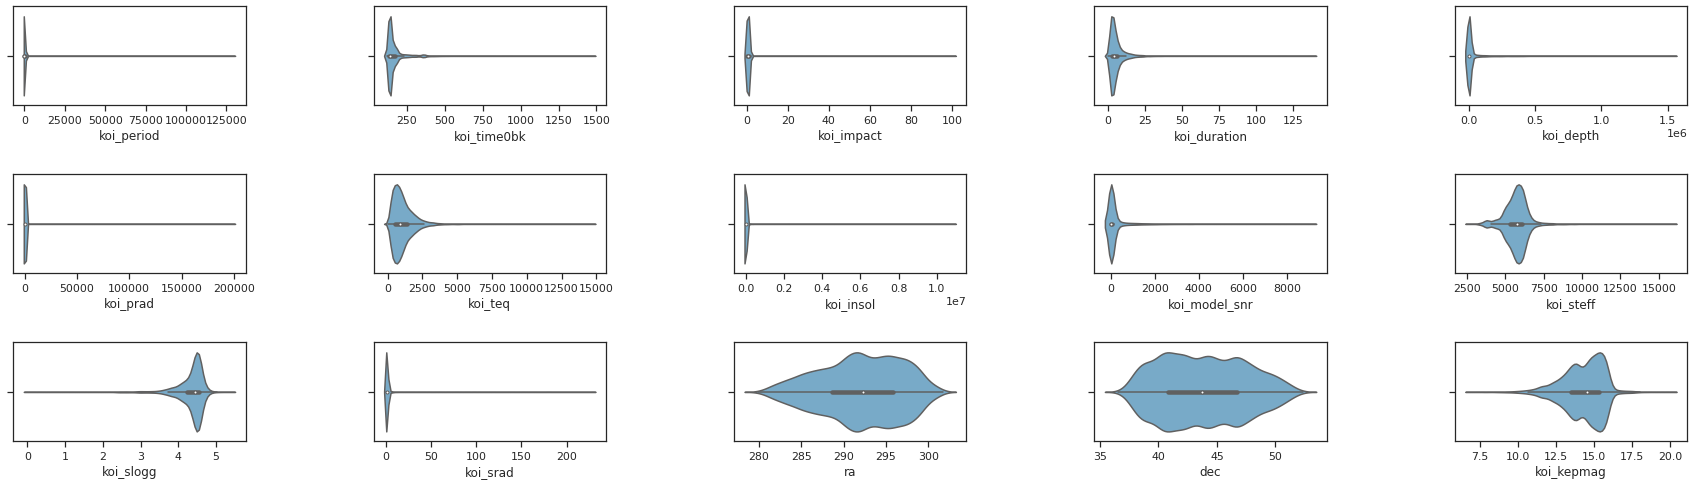

In [88]:
cols = kepler.columns[5:]

col_idx = 0

fig = plt.figure(figsize=(30, 8))
fig.subplots_adjust(hspace=0.7, wspace=0.55)

for i in range(1, 16):
  fig.add_subplot(3, 5, i) 
  sns.violinplot( x=cols[col_idx], data=kepler, palette='Blues')
  col_idx += 1


plt.show()

## <a name='11'></a>5.4 Analiza korelacji

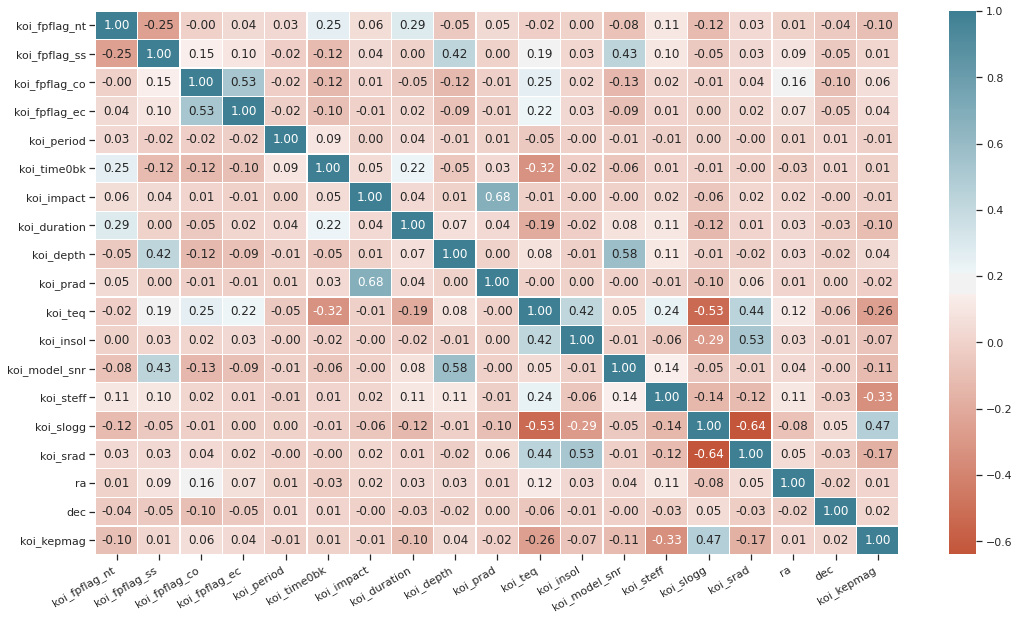

In [89]:
corr = kepler.corr()

fig = plt.figure(figsize=(18,10))
g = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, fmt='.2f', linewidth=.3, cmap=sns.diverging_palette(20, 220, n=256))
g.set_xticklabels( g.get_xticklabels(), rotation=30,  horizontalalignment='right', fontweight='light' )

plt.show()

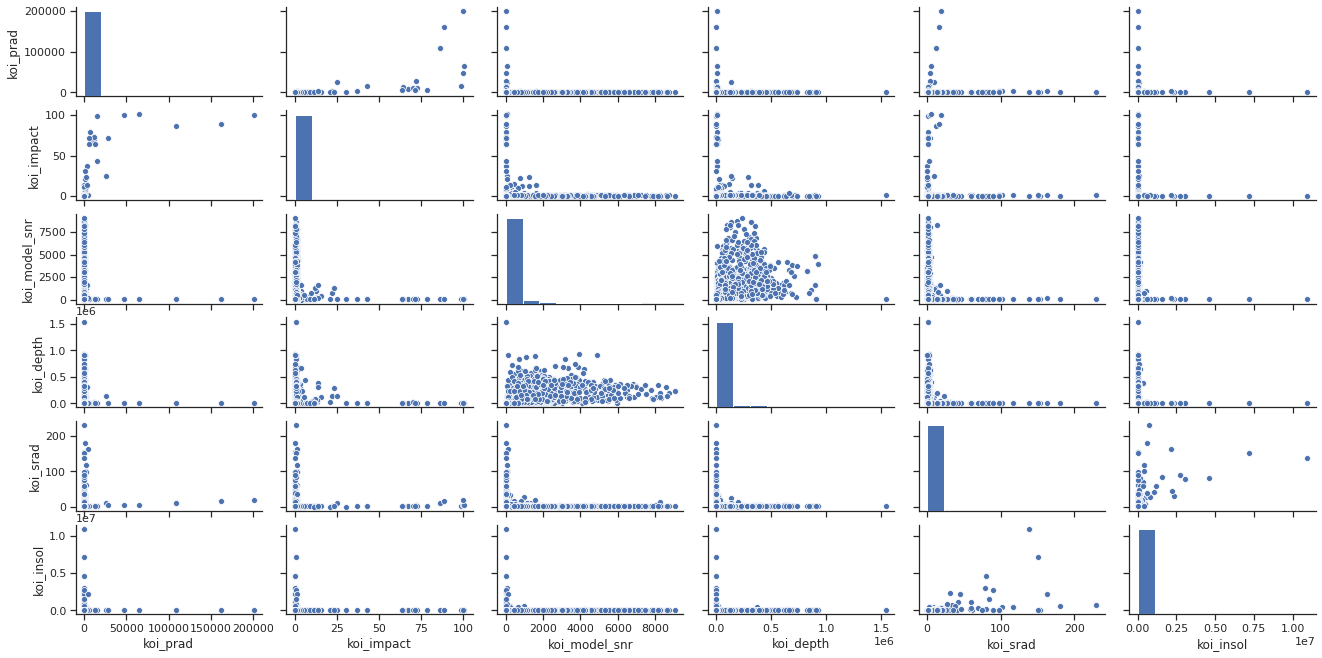

In [90]:
cols = [ 'koi_prad', 'koi_impact', 'koi_model_snr', 'koi_depth', 'koi_srad', 'koi_insol']
sns.pairplot(kepler[cols], height=1.5, aspect=2)
plt.show()

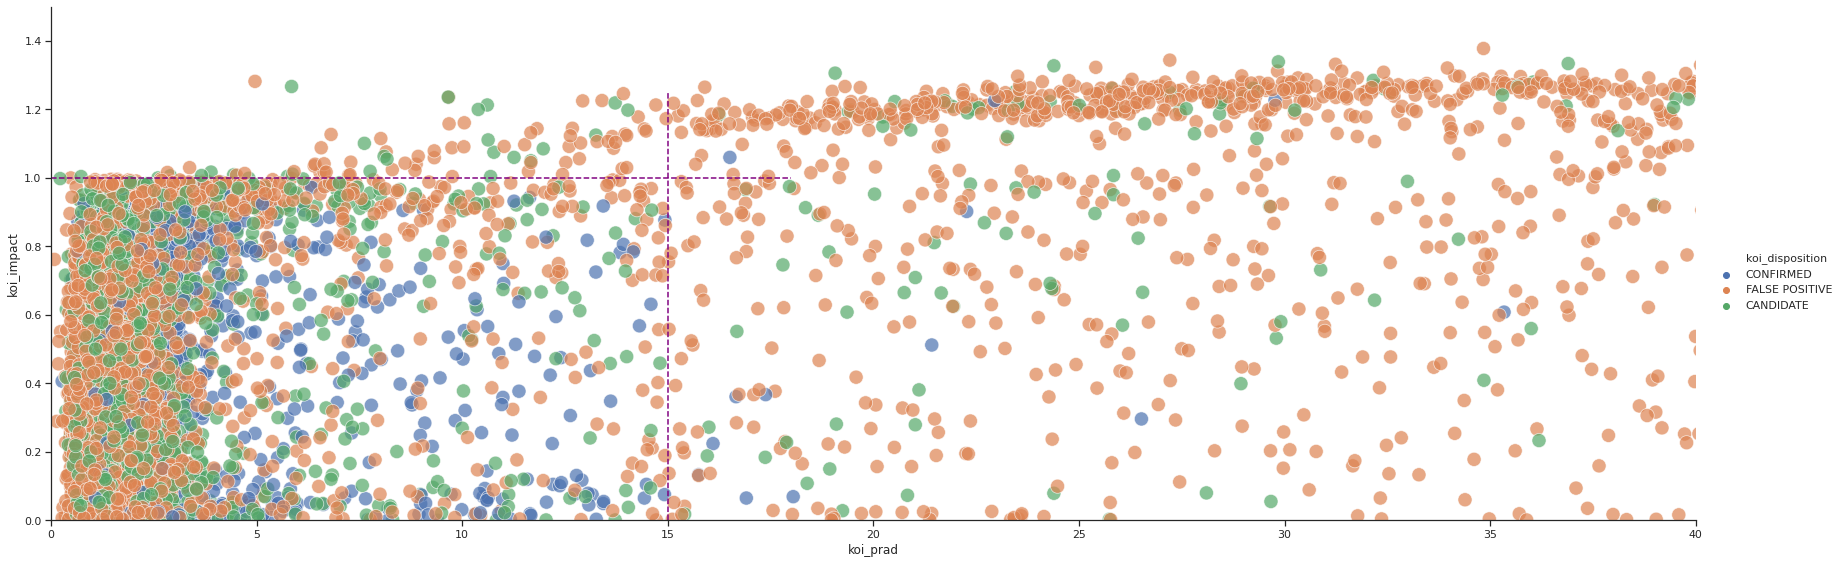

In [91]:
g = sns.relplot(x='koi_prad', y='koi_impact', data=kepler, height=8 , aspect=3, hue='koi_disposition', s=200, alpha=0.7)
plt.xlim(0, 40)
plt.ylim(0, 1.5)
plt.vlines(x=15, ymin=0, ymax=1.25, colors='purple', linestyles='--', lw=1.5)
plt.hlines(y=1, xmin=0, xmax=18, colors='purple', linestyles='--', lw=1.5)

plt.show()

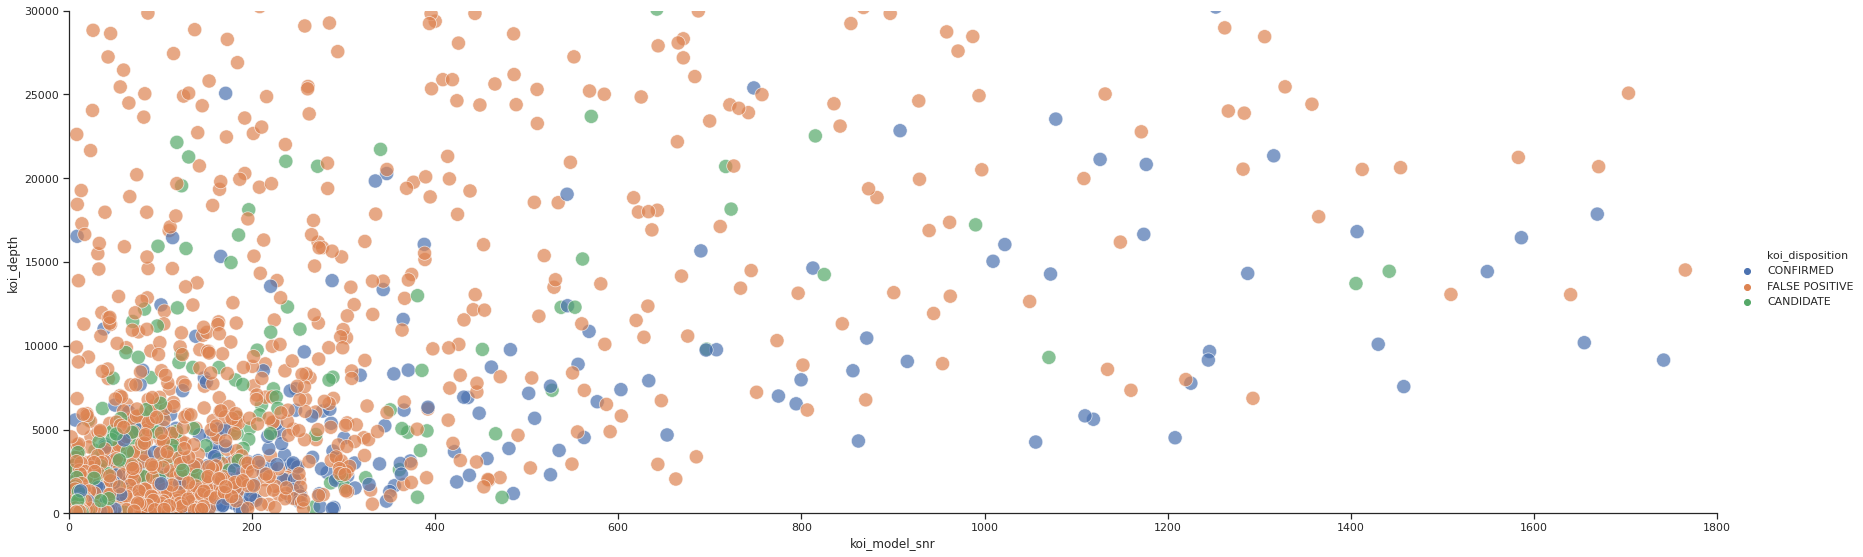

In [92]:
g2 = sns.relplot(x='koi_model_snr', y='koi_depth', data=kepler, height=8 , aspect=3, hue='koi_disposition', s=200, alpha=0.7)
plt.xlim(0, 1800)
g2 = plt.ylim(0, 3*10**4)
plt.show()

# <a name='12'></a>**6. Uczenie maszynowe**

## <a name='13'></a>6.1 Przygotowanie danych do uczenia maszynowego

In [93]:
kepler.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,76.3,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509


### <a name='14'></a>6.1.1 Liczba występowań dla każdej z etykiet

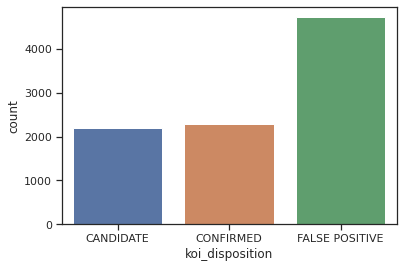

In [94]:
sns.countplot(x='koi_disposition', data=kepler)

plt.show()

### <a name='15'></a>6.1.2 Zakodowanie wartości etykiet

In [95]:
encoder = LabelEncoder()

y = kepler['koi_disposition']

kepler['koi_disposition'] = encoder.fit_transform(y)

kepler.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,1,0,0,0,0,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,1,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,2,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,76.3,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,2,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,1,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509


### <a name='16'></a>6.1.3 Podział danych na zbiory uczące i testowe

In [96]:
X = kepler.drop("koi_disposition", axis=1).values
y = kepler['koi_disposition'].values

print(f'X: {X.shape} ')
print(f'y: {y.shape} ')

X: (9200, 19) 
y: (9200,) 


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'X_train shape:  {X_train.shape}')
print(f'X_test shape:   {X_test.shape}')

print(f'y_train shape:  {y_train.shape}')
print(f'y_test shape:   {y_test.shape}')

X_train shape:  (7360, 19)
X_test shape:   (1840, 19)
y_train shape:  (7360,)
y_test shape:   (1840,)


### <a name='17'></a>6.1.4 Skalowanie cech

In [98]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## <a name='18'></a>6.2 Testowanie modeli:

### <a name='19'></a>6.2.1 Model regresji logistycznej

In [99]:
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8222826086956522

In [101]:
# Sprawdzimy jak model działa na danych treningowych i testowych:

print('Accuracy(train): {}'.format(round(log_reg.score(X_train, y_train), 4) ))
print('Accuracy(test): {}'.format(round(log_reg.score(X_test, y_test), 4) ))

Accuracy(train): 0.8155
Accuracy(test): 0.8223


In [102]:
y_pred = log_reg.predict(X_test)

# Wyświetlimy 30 pierwszych próbek
y_pred[:30]

array([2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 1, 2, 0, 2,
       2, 0, 1, 1, 1, 1, 1, 2])

In [103]:
log_reg_report = classification_report(y_test, y_pred, target_names=encoder.classes_)
print(log_reg_report)

                precision    recall  f1-score   support

     CANDIDATE       0.62      0.61      0.62       409
     CONFIRMED       0.67      0.67      0.67       475
FALSE POSITIVE       0.98      0.99      0.98       956

      accuracy                           0.82      1840
     macro avg       0.76      0.76      0.76      1840
  weighted avg       0.82      0.82      0.82      1840



### <a name='20'></a>6.2.2 Model k-najbliższych sąsiadów



In [104]:
KNeighbors_classifier = KNeighborsClassifier(n_neighbors=8)
KNeighbors_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [105]:
y_pred = KNeighbors_classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.7989130434782609

In [106]:
# Sprawdzimy jak model działa na danych treningowych i testowych:

print('Accuracy(train): {}'.format(round(KNeighbors_classifier.score(X_train, y_train), 4) ))
print('Accuracy(test): {}'.format(round(KNeighbors_classifier.score(X_test, y_test), 4) ))

Accuracy(train): 0.8552
Accuracy(test): 0.7989


In [107]:
KNeighbors_report = classification_report(y_test, y_pred, target_names=encoder.classes_)
print(KNeighbors_report)

                precision    recall  f1-score   support

     CANDIDATE       0.56      0.62      0.59       409
     CONFIRMED       0.65      0.57      0.61       475
FALSE POSITIVE       0.98      0.99      0.98       956

      accuracy                           0.80      1840
     macro avg       0.73      0.73      0.73      1840
  weighted avg       0.80      0.80      0.80      1840



### <a name='21'></a>6.2.3 Model drzewa decyzyjnego

In [108]:
tree_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)

tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [109]:
y_pred = tree_classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.8608695652173913

In [110]:
# Sprawdzimy jak model działa na danych treningowych i testowych:

print('Accuracy(train): {}'.format(round(tree_classifier.score(X_train, y_train), 4) ))
print('Accuracy(test): {}'.format(round(tree_classifier.score(X_test, y_test), 4) ))

Accuracy(train): 0.8625
Accuracy(test): 0.8609


In [111]:
# Sprawdzamy, które cechy w naszym modelu miały duży wpływ na działanie modelu
tree_classifier.feature_importances_    

array([3.11384372e-01, 2.43220943e-01, 2.67732682e-01, 0.00000000e+00,
       6.54773884e-04, 8.45077057e-04, 0.00000000e+00, 1.09363154e-03,
       0.00000000e+00, 3.00909429e-04, 0.00000000e+00, 7.43590732e-05,
       1.74693253e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

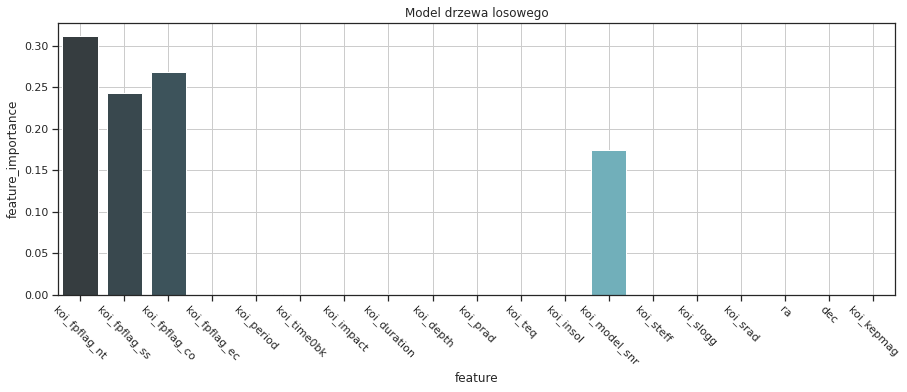

In [112]:
feature_names = kepler.drop("koi_disposition", axis=1).columns
target_names = 'koi_disposition'

features = pd.DataFrame(data={'feature': feature_names, 'feature_importance': tree_classifier.feature_importances_})


plt.figure(figsize=(15, 5))

g = sns.barplot(data=features, x='feature', y='feature_importance',  palette='GnBu_d')
g.set(title='Model drzewa losowego')
g.set_xticklabels( g.get_xticklabels(), rotation=-45 )

plt.grid()
plt.show()

In [113]:
px.bar(features, x='feature', y='feature_importance', width=800, height=400, title='Model drzewa losowego')

In [114]:
tree_report = classification_report(y_test, y_pred, target_names=encoder.classes_)
print(tree_report)

                precision    recall  f1-score   support

     CANDIDATE       0.75      0.67      0.71       409
     CONFIRMED       0.73      0.82      0.77       475
FALSE POSITIVE       0.98      0.96      0.97       956

      accuracy                           0.86      1840
     macro avg       0.82      0.82      0.82      1840
  weighted avg       0.86      0.86      0.86      1840



### <a name='22'></a>6.2.4 Model lasów losowych

In [115]:
forest_classifier = RandomForestClassifier(n_estimators=15, random_state=42)

forest_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [116]:
y_pred = forest_classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.8847826086956522

In [117]:
# Sprawdzimy jak model działa na danych treningowych i testowych:

print('Accuracy(train): {}'.format(round(forest_classifier.score(X_train, y_train), 4) ))
print('Accuracy(test): {}'.format(round(forest_classifier.score(X_test, y_test), 4) ))

Accuracy(train): 0.9976
Accuracy(test): 0.8848


In [118]:
forest_classifier.feature_importances_                       

array([0.11624693, 0.09193455, 0.11659859, 0.04682355, 0.04616389,
       0.03281802, 0.05019382, 0.0376828 , 0.06656677, 0.0671532 ,
       0.03065121, 0.04411804, 0.12273913, 0.02509205, 0.01889671,
       0.02179285, 0.02204725, 0.0206566 , 0.02182401])

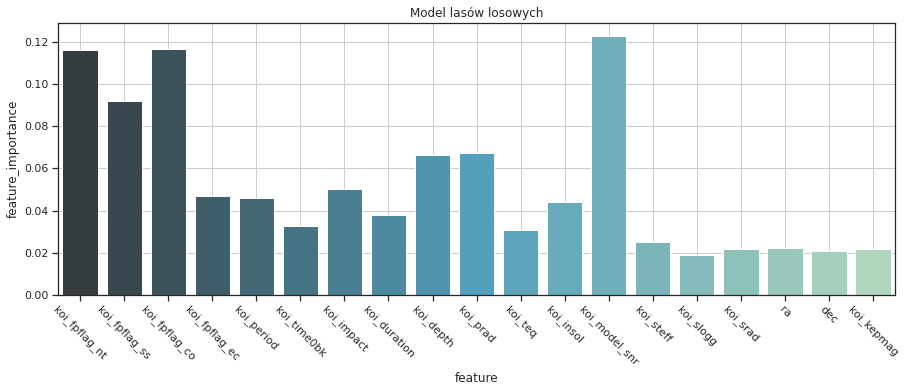

In [119]:
features = pd.DataFrame(data={'feature': feature_names, 'feature_importance': forest_classifier.feature_importances_})

plt.figure(figsize=(15, 5))

g = sns.barplot(data=features, x='feature', y='feature_importance', palette='GnBu_d')
g.set(title='Model lasów losowych')
g.set_xticklabels( g.get_xticklabels(), rotation=-45 )

plt.grid()
plt.show()

In [120]:
px.bar(features, x='feature', y='feature_importance', width=800, height=400, title='Model lasów losowych')

In [121]:
forest_report = classification_report(y_test, y_pred, target_names=encoder.classes_)
print(forest_report)

                precision    recall  f1-score   support

     CANDIDATE       0.74      0.79      0.77       409
     CONFIRMED       0.82      0.76      0.79       475
FALSE POSITIVE       0.98      0.99      0.98       956

      accuracy                           0.88      1840
     macro avg       0.85      0.85      0.85      1840
  weighted avg       0.89      0.88      0.88      1840



### <a name='23'></a>6.2.5 Maszyna wektorów nośnych

In [122]:
svc_classifier = SVC(C=1.0, kernel='rbf')

svc_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [123]:
y_pred = svc_classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.8266304347826087

In [124]:
# Sprawdzimy jak model działa na danych treningowych i testowych:

print('Accuracy(train): {}'.format(round(svc_classifier.score(X_train, y_train), 4) ))
print('Accuracy(test): {}'.format(round(svc_classifier.score(X_test, y_test), 4) ))

Accuracy(train): 0.8348
Accuracy(test): 0.8266


In [125]:
svc_report = classification_report(y_test, y_pred, target_names=encoder.classes_)
print(svc_report)

                precision    recall  f1-score   support

     CANDIDATE       0.64      0.58      0.61       409
     CONFIRMED       0.67      0.71      0.69       475
FALSE POSITIVE       0.98      0.99      0.98       956

      accuracy                           0.83      1840
     macro avg       0.76      0.76      0.76      1840
  weighted avg       0.82      0.83      0.82      1840



### <a name='24'></a>6.2.6 Naiwny klasyfikator bayesowski

In [126]:
GaussianNB_model = GaussianNB()
GaussianNB_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [127]:
y_pred = GaussianNB_model.predict(X_test)

accuracy_score(y_test, y_pred)

0.7494565217391305

In [128]:
# Sprawdzimy jak model działa na danych treningowych i testowych:

print('Accuracy(train): {}'.format(round(GaussianNB_model.score(X_train, y_train), 4) ))
print('Accuracy(test): {}'.format(round(GaussianNB_model.score(X_test, y_test), 4) ))

Accuracy(train): 0.7539
Accuracy(test): 0.7495


## <a name='25'></a>6.3 Porównanie otrzymanych wyników

In [129]:
metric_cols =[
              ('score log_reg',    'Train[%]'), ('score log_reg',    'Test[%]'),
              ('score KNeighbors', 'Train[%]'), ('score KNeighbors', 'Test[%]'),             
              ('score tree',       'Train[%]'), ('score tree',       'Test[%]'),                          
              ('score forest',     'Train[%]'), ('score forest',     'Test[%]'),  
              ('score SVC',        'Train[%]'), ('score SVC',        'Test[%]'),             
              ('score GaussianNB', 'Train[%]'), ('score GaussianNB', 'Test[%]')
             ]

metrics_df = pd.DataFrame(columns=metric_cols )
metrics_df.columns = pd.MultiIndex.from_tuples(metrics_df.columns)

index = 0

for i in range(20):  
  # podzielimy dane na zbior2y uczące i testowe:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  # Skalowanie cech
  scaler = StandardScaler()
  scaler.fit(X_train)

  X_train = scaler.transform(X_train)
  X_test  = scaler.transform(X_test)  

  # Testowanie modeli
  log_reg = LogisticRegression(max_iter=1000)
  log_reg.fit(X_train, y_train)

  KNeighbors_classifier = KNeighborsClassifier(n_neighbors=8)
  KNeighbors_classifier.fit(X_train, y_train) 

  tree_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
  tree_classifier.fit(X_train, y_train)

  forest_classifier = RandomForestClassifier(n_estimators=15, random_state=42)
  forest_classifier.fit(X_train, y_train)  

  svc_classifier = SVC(C=1.0, kernel='rbf')
  svc_classifier.fit(X_train, y_train)  

  GaussianNB_model = GaussianNB()
  GaussianNB_model.fit(X_train, y_train)  

  # ---------------------------------------------------------------------------
  score_log_reg_train    = round(log_reg.score(X_train, y_train)*100, 3)
  score_log_reg_test     = round(log_reg.score(X_test, y_test)*100, 3)

  score_KNeighbors_train = round(KNeighbors_classifier.score(X_train, y_train)*100, 3)  
  score_KNeighbors_test  = round(KNeighbors_classifier.score(X_test, y_test)*100, 3) 

  score_tree_train       = round(tree_classifier.score(X_train, y_train)*100, 3)  
  score_tree_test        = round(tree_classifier.score(X_test, y_test)*100, 3) 

  score_forest_train     = round(forest_classifier.score(X_train, y_train)*100, 3)  
  score_forest_test      = round(forest_classifier.score(X_test, y_test)*100, 3) 

  score_svc_train        = round(svc_classifier.score(X_train, y_train)*100, 3)  
  score_svc_test         = round(svc_classifier.score(X_test, y_test)*100, 3)  

  score_GaussianNB_train = round(GaussianNB_model.score(X_train, y_train)*100, 3)  
  score_GaussianNB_test  = round(GaussianNB_model.score(X_test, y_test)*100, 3)      
  # -----------------------------------------------------------------------------
  metrics_df.loc[index] = [
                           score_log_reg_train, score_log_reg_test,
                           score_KNeighbors_train, score_KNeighbors_test,
                           score_tree_train, score_tree_test,
                           score_forest_train, score_forest_test,
                           score_svc_train, score_svc_test,
                           score_GaussianNB_train, score_GaussianNB_test                        
                          ]

  index +=1

metrics_df.tail()

score log_reg         score KNeighbors  ... score SVC score GaussianNB        
        Train[%] Test[%]         Train[%]  ...   Test[%]         Train[%] Test[%]
15        81.916  80.815           85.353  ...    81.033           70.177  67.500
16        81.834  81.413           85.679  ...    81.957           69.796  68.370
17        81.617  82.228           85.340  ...    83.696           69.946  69.674
18        81.603  81.304           85.571  ...    83.424           69.239  69.130
19        81.875  81.848           85.870  ...    82.500           69.076  69.837

[5 rows x 12 columns]

## <a name='26'></a>6.4 Przeprowadzenie walidacji krzyżowej

In [130]:
class CrossVal:
  '''
  Create cross validation and  plot barplot
  ''' 
  def __init__(self, model_dict, cv):
    '''
    model_dict - dict of model names
    cv - determines the cross-validation splitting strategy 
    '''   
    self.cv = cv
    self.model_dict = model_dict
    self.row_num = 1
    self.col_num = 1
    self.cross_val_scores_df = pd.DataFrame()
    self.titleList = []

  def Create_cross_val_df(self):                    
    for i, self.name in enumerate(model_dict):
      model = [val for val in model_dict.values() ][i]
      self.cross_val_scores = cross_val_score(estimator=model, X=X_train, y=y_train, cv=self.cv)
      
      self.cross_val_scores_df[self.name] = self.cross_val_scores 

      self.title=f'model: {self.name}<br>Accuracy: {self.cross_val_scores_df[self.name].mean():.4f} (+/- {self.cross_val_scores_df[self.name].std():.3f})'
      self.titleList.append( self.title)

    return self.cross_val_scores_df
    
  def Create_barplots(self):
      fig = make_subplots(rows=2, cols=3,
      subplot_titles=self.titleList
          )
      for i, name in enumerate(model_dict):
        if self.col_num == 4:
          self.col_num  = 1
          self.row_num += 1
        name =px.bar( self.cross_val_scores_df, y= name, color= name )      
        fig.add_trace(name['data'][0], row=self.row_num, col=self.col_num)
        self.col_num += 1

      fig.update_layout( title_text=f'Walidacja krzyżowa dla {self.cv} podziałów:', coloraxis=dict(colorscale='Viridis'))
      fig.show()                           

In [131]:
model_dict = {
              'logistic regression'   : log_reg,
              'KNeighbors classifier' : KNeighbors_classifier,
              'tree classifier'       : tree_classifier,
              'forest classifier'     : forest_classifier,
              'svc classifier'        : svc_classifier,
              'GaussianNB model'      : GaussianNB_model
              }

crossVal = CrossVal(model_dict, cv= 15)

In [132]:
models_acc_df = crossVal.Create_cross_val_df()
models_acc_df

,logistic regression,KNeighbors classifier,tree classifier,forest classifier,svc classifier,GaussianNB model
0,0.824847,0.808554,0.853360,0.881874,0.816701,0.708758
1,0.814664,0.822811,0.837067,0.867617,0.845214,0.694501
2,0.824847,0.808554,0.849287,0.881874,0.824847,0.700611
3,0.800407,0.802444,0.857434,0.898167,0.792261,0.692464
4,0.824847,0.794297,0.861507,0.887984,0.822811,0.737271
5,0.808554,0.802444,0.871690,0.916497,0.843177,0.690428
6,0.806517,0.818737,0.857434,0.892057,0.826884,0.698574
7,0.822811,0.816701,0.871690,0.896130,0.820774,0.696538
8,0.788187,0.786151,0.865580,0.881874,0.794297,0.702648
9,0.814664,0.812627,0.875764,0.883910,0.837067,0.678208


In [133]:
crossVal.titleList

['model: logistic regression<br>Accuracy: 0.8151 (+/- 0.012)',
 'model: KNeighbors classifier<br>Accuracy: 0.8095 (+/- 0.016)',
 'model: tree classifier<br>Accuracy: 0.8587 (+/- 0.011)',
 'model: forest classifier<br>Accuracy: 0.8917 (+/- 0.012)',
 'model: svc classifier<br>Accuracy: 0.8245 (+/- 0.016)',
 'model: GaussianNB model<br>Accuracy: 0.6967 (+/- 0.014)']

In [134]:
crossVal.Create_barplots()

In [135]:
model_ranking = pd.DataFrame({'Accuracy' : models_acc_df.mean().sort_values()})
model_ranking

,Accuracy
GaussianNB model,0.696735
KNeighbors classifier,0.809514
logistic regression,0.815084
svc classifier,0.824459
tree classifier,0.858694
forest classifier,0.891716


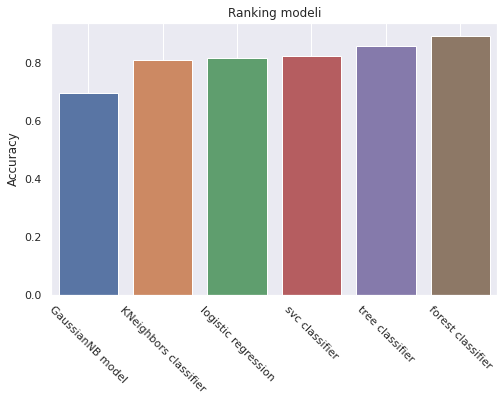

In [136]:
plt.figure(figsize=(8, 5))
sns.set_style("darkgrid")

g = sns.barplot(data=model_ranking, x=model_ranking.index, y='Accuracy')
g.set(title='Ranking modeli')
g.set_xticklabels( g.get_xticklabels(), rotation=-45 )

plt.grid()
plt.show()


## <a name='27'></a>6.5 Podgląd na macierze błędów dla poszczególnych modeli


In [137]:
class ConfusionMatrix:

  def __init__(self, model_dict, X_test, y_test):
    self.model_dict = model_dict
    self.X_test = X_test
    self.y_test = y_test
    self.y_pred_list = []
    self.model_name_idx = 0
    self.y_pred_idx = 0

 
  def __get_y_pred(self):
    for i, name in enumerate(self.model_dict):
      self.model = [val for val in self.model_dict.values() ][i]
      self.y_pred = self.model.predict(self.X_test) 
      self.y_pred_list.append( self.y_pred )

  def create_matrix(self):
    self.__get_y_pred()

    sns.set_style("darkgrid")
    fig = plt.figure(figsize=(25, 5))
    fig.subplots_adjust(hspace=0.8, wspace=0.3)

    for i in range(1, 7):
      fig.add_subplot(2, 3, i) 

      self.cm = confusion_matrix(self.y_test, self.y_pred_list[self.y_pred_idx])
      self.model_acc = accuracy_score(self.y_test,   self.y_pred_list[self.y_pred_idx])


      g = sns.heatmap(self.cm, annot=True, fmt='d', linewidth=.2, cmap='Blues',
                      xticklabels= encoder.classes_, yticklabels= encoder.classes_,
                      annot_kws={"size": 15})
      
      g.tick_params(labelsize=10)
      g.xaxis.tick_top()
      plt.yticks(rotation=0) 
      plt.xticks(rotation=0) 
      plt.title(f'{list(model_dict.keys())[self.model_name_idx]} \n Accuracy: {self.model_acc:.4f}', fontdict={'fontsize' : 15, 'weight':'bold'})

      self.model_name_idx += 1
      self.y_pred_idx += 1
    plt.show()

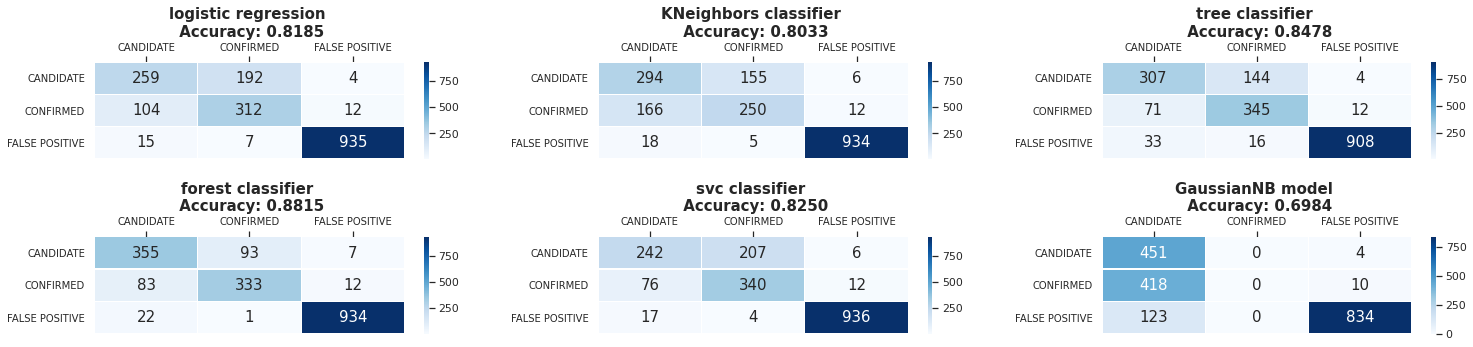

In [138]:
models_conf_matrix = ConfusionMatrix(
                                 model_dict= model_dict,
                                 X_test= X_test,
                                 y_test= y_test
                                 )

models_conf_matrix.create_matrix()   

## <a name='28'></a>6.6 Testowanie sieci neuronowej

In [139]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras import optimizers
from keras.utils.np_utils import to_categorical



np.set_printoptions(precision=12, suppress=True)

In [140]:
print('X_train: ', X_train.shape, X_train.dtype)
print('y_train: ', y_train.shape, y_train.dtype)

X_train:  (7360, 19) float64
y_train:  (7360,) int64


In [141]:
X_train[0]

array([-0.45056355689 ,  1.785765508656, -0.507843117199, -0.377729675985,
       -0.045854468813, -0.457333336381, -0.156050044124, -0.06293031662 ,
        4.296219111732, -0.010891623343, -0.072267059267, -0.055466654479,
        5.029920333311,  0.542693505602,  0.290223879951, -0.131694150113,
       -1.886096617827, -0.627300673103, -0.391367053077])

In [142]:
y_train[0]

2

In [143]:
X_32train = X_train.astype('float32')
y_32train = to_categorical(y_train.astype('float32'))


X_32test = X_test.astype('float32')
y_32test = to_categorical(y_test.astype('float32'))


In [144]:
y_32train

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [145]:
visible = Input(shape=(19,))

y = Dense(64, activation='relu')(visible)
y= Dropout(0.5)(y)
y = Dense(64, activation='relu')(y)
y = Dense(16, activation='relu')(y)
y = Dense(8, activation='relu')(y)
y = Dense(4, activation='relu')(y)

output = Dense(3, activation='softmax')(y)

model = Model(inputs=visible, outputs=output)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 19)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1280      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                

In [146]:
model.compile(optimizer= optimizers.Adam(lr=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history = model.fit(x= X_32train, y= y_32train, epochs=150, batch_size=32, validation_split=0.1)

Epoch 1/150
207/207 [==============================] - 1s 3ms/step - loss: 1.1189 - accuracy: 0.3348 - val_loss: 1.0816 - val_accuracy: 0.5747
Epoch 2/150
207/207 [==============================] - 0s 1ms/step - loss: 1.0622 - accuracy: 0.5400 - val_loss: 1.0068 - val_accuracy: 0.6766
Epoch 3/150
207/207 [==============================] - 0s 2ms/step - loss: 0.9959 - accuracy: 0.6221 - val_loss: 0.9387 - val_accuracy: 0.7120
Epoch 4/150
207/207 [==============================] - 0s 2ms/step - loss: 0.9442 - accuracy: 0.6726 - val_loss: 0.9000 - val_accuracy: 0.7242
Epoch 5/150
207/207 [==============================] - 0s 2ms/step - loss: 0.9111 - accuracy: 0.6923 - val_loss: 0.8738 - val_accuracy: 0.7092
Epoch 6/150
207/207 [==============================] - 0s 2ms/step - loss: 0.8830 - accuracy: 0.7258 - val_loss: 0.8544 - val_accuracy: 0.7473
Epoch 7/150
207/207 [==============================] - 0s 2ms/step - loss: 0.8580 - accuracy: 0.7366 - val_loss: 0.8278 - val_accuracy: 0.7446

In [147]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [148]:
scores = model.evaluate(x=X_32test, y=y_32test, batch_size=32)
print('Loss: ', scores[0])
print('Accuracy: ', scores[1])

58/58 [==============================] - 0s 1ms/step - loss: 0.3964 - accuracy: 0.8250
Loss:  0.3963862359523773
Accuracy:  0.824999988079071


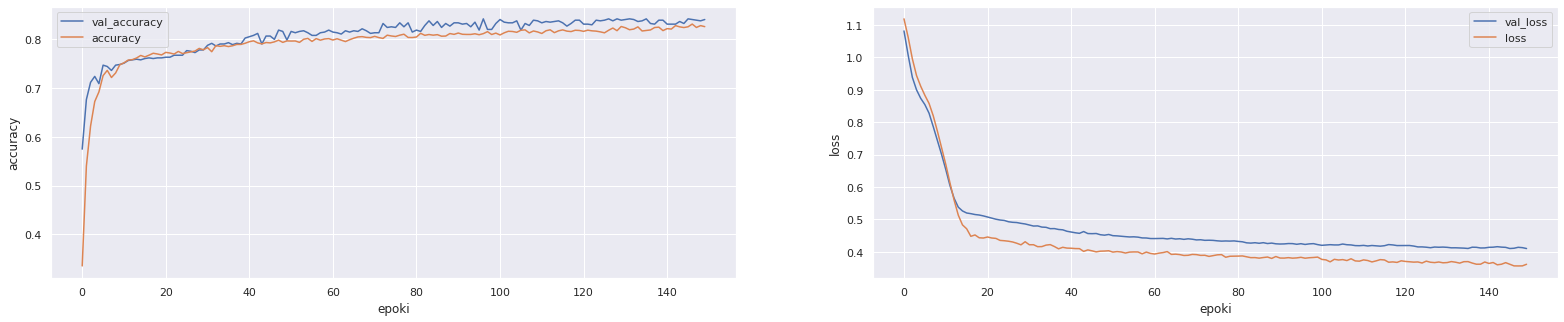

In [149]:
metric = 'accuracy'
val_metric = 'val_accuracy'


sns.set_style("darkgrid")
fig, axes = plt.subplots(1,2, figsize=(27,5))

for i in range(2):
  if i == 1:
        metric = 'loss'
        val_metric = 'val_loss'
  axes[i].plot(history.history[ val_metric], label= val_metric)
  axes[i].plot(history.history[ metric], label= metric)
  axes[i].set(xlabel='epoki', ylabel= metric)  
  axes[i].legend(loc='best')
plt.show()

## <a name='29'></a>6.7 Zastosowanie redukcji wymiarowości - algorytm PCA

In [150]:
kepler.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,1,0,0,0,0,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,1,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,2,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,76.3,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,2,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,1,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509


In [151]:
print(f'X_train shape:  {X_train.shape}')
print(f'X_test shape:   {X_test.shape}')

X_train shape:  (7360, 19)
X_test shape:   (1840, 19)


In [152]:
X_train[:3]

array([[-0.45056355689 ,  1.785765508656, -0.507843117199,
        -0.377729675985, -0.045854468813, -0.457333336381,
        -0.156050044124, -0.06293031662 ,  4.296219111732,
        -0.010891623343, -0.072267059267, -0.055466654479,
         5.029920333311,  0.542693505602,  0.290223879951,
        -0.131694150113, -1.886096617827, -0.627300673103,
        -0.391367053077],
       [-0.45056355689 , -0.559983936946, -0.507843117199,
        -0.377729675985, -0.045418755998, -0.433187270102,
         0.051439232203, -0.706427468848, -0.283425379787,
        -0.031250264857, -0.672257401581, -0.057585802962,
        -0.289918098149, -2.102216675172,  1.033776940381,
        -0.20274218797 , -1.873180085879, -0.041997199708,
         0.095077315987],
       [-0.45056355689 ,  1.785765508656,  1.969112046875,
        -0.377729675985, -0.048192466214, -0.479733550012,
         0.08117936181 , -0.215645042741, -0.263067661142,
        -0.031021792534, -0.66402224002 , -0.057578073493,
    

In [153]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca.shape

(7360, 3)

In [154]:
classes = encoder.inverse_transform(y_train)

classes

array(['FALSE POSITIVE', 'CONFIRMED', 'FALSE POSITIVE', ...,
       'FALSE POSITIVE', 'CONFIRMED', 'CONFIRMED'], dtype=object)

In [155]:
pca_df = pd.DataFrame(data={'pca_1': X_train_pca[:, 0], 'pca_2': X_train_pca[:, 1], 'pca_3': X_train_pca[:, 2], 'koi disposition' : classes})

pca_df.head()

,pca_1,pca_2,pca_3,koi disposition
0,0.939145,-6.188007,1.396524,FALSE POSITIVE
1,-1.706070,0.502702,-0.492517,CONFIRMED
2,-1.245050,-0.569372,-2.335035,FALSE POSITIVE
3,-0.082874,0.979703,1.442914,FALSE POSITIVE
4,1.117524,-1.437027,0.411577,FALSE POSITIVE


In [156]:
# Procent wyjąśnionej wariancji

kepler_results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})

kepler_results['cumulative'] = kepler_results['explained_variance_ratio'].cumsum() # obliczenie skumulowanej wariancji wyjaśnionej
kepler_results['component'] = kepler_results.index + 1

kepler_results

,explained_variance_ratio,cumulative,component
0,0.144555,0.144555,1
1,0.109028,0.253583,2
2,0.101388,0.354971,3


In [157]:
pca_data_df = pca_df[pca_df.columns[:-1]]

pca_data_df.head()

,pca_1,pca_2,pca_3
0,0.939145,-6.188007,1.396524
1,-1.706070,0.502702,-0.492517
2,-1.245050,-0.569372,-2.335035
3,-0.082874,0.979703,1.442914
4,1.117524,-1.437027,0.411577


## <a name='30'></a>6.8 Alogrytm KMeans

In [158]:
from sklearn.cluster import KMeans


kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(pca_data_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [159]:
y_kmeans = kmeans_model.predict(pca_data_df)
y_kmeans[:10]

array([0, 2, 2, 2, 0, 2, 2, 2, 1, 2], dtype=int32)

In [160]:
pca_data_df['y_kmeans'] = y_kmeans

pca_data_df.head()

,pca_1,pca_2,pca_3,y_kmeans
0,0.939145,-6.188007,1.396524,0
1,-1.706070,0.502702,-0.492517,2
2,-1.245050,-0.569372,-2.335035,2
3,-0.082874,0.979703,1.442914,2
4,1.117524,-1.437027,0.411577,0


In [162]:
true_labels = encoder.inverse_transform(y_kmeans)
true_labels

array(['CANDIDATE', 'FALSE POSITIVE', 'FALSE POSITIVE', ...,
       'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE'], dtype=object)

In [163]:
pca_data_df['true_labels'] = true_labels

pca_data_df.head()

,pca_1,pca_2,pca_3,y_kmeans,true_labels
0,0.939145,-6.188007,1.396524,0,CANDIDATE
1,-1.706070,0.502702,-0.492517,2,FALSE POSITIVE
2,-1.245050,-0.569372,-2.335035,2,FALSE POSITIVE
3,-0.082874,0.979703,1.442914,2,FALSE POSITIVE
4,1.117524,-1.437027,0.411577,0,CANDIDATE


In [165]:
px.scatter_3d(pca_data_df, x= 'pca_1', y= 'pca_2', z= 'pca_3', color= 'true_labels', template='plotly_dark', width=1000)